In [61]:
import pandas as pd
import pandas_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import time
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, StandardScaler
# from sklearn.preprocessing import PowerTransform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats.stats import pearsonr, spearmanr

from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy import stats
from numpy import mean
from numpy import std
import math

import warnings
warnings.filterwarnings("ignore")

import tensorflow
print(tensorflow.__version__)
# from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow import feature_column
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorboard.plugins.hparams import api as hp
print("GPU Available: ", tensorflow.test.is_gpu_available())

2.1.0
GPU Available:  True


## Get the data

In [ ]:
input_path = "gs://agriculture-sara/Data sets/Data sets for Comparison/Version 2/All_Manual_Joint_Albedo_NDVI_LST_full.csv"
df = pd.read_csv(input_path, delimiter=',')

columnsToDrop = ['G','G-1','G-2','G-3','G-4','G-5',
                 'H', 'H_bowen_corr', 'H_bowen_corr-1', 'H_bowen_corr-2', 'H_bowen_corr-3', 'H_bowen_corr-4',
                 'H_bowen_corr-5',
                 'NETRAD','NETRAD-1','NETRAD-2','NETRAD-3','NETRAD-4','NETRAD-5',
                 'LE', 'LE_bowen_corr',
                 'ETo', 'EToF', 'ETr', 'ETrF', 'Cloud', 'Image Id',
                 'Tier', 'EEflux ETo', 'EEflux ETr', 'EEflux EToF', 'EEflux ETrF']
df = df.drop(columnsToDrop, axis = 1)
df.dropna(inplace=True)

In [ ]:
output_column = "LE_bowen_corr(mm)"
eeflux_column = "EEflux ET"
df = df[df[output_column].between(1, 15)]
print("shape is:", df.shape)
df.head()

In [ ]:
df["Ratio"] = df[output_column]/df[eeflux_column]
df["Gap"] = np.abs(df[output_column]-df[eeflux_column])
df = df.drop([output_column, eeflux_column], axis = 1)
df["Gap Sqrt"] = np.sqrt(df["Gap"])
df["Gap Log"] = np.log(df["Gap"])

In [ ]:
print(df.columns)
X = df.drop(["Gap"], axis = 1)
Y = df["Gap"]

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(35,35))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
print(df.columns)
print(df.shape)

In [ ]:
df.isnull().mean() * 10

In [ ]:
df[["Ratio", "Gap"]].head(20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f4171438>]],
      dtype=object)

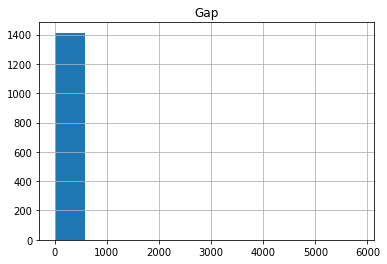

In [55]:
df[["Gap"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f4190be0>]],
      dtype=object)

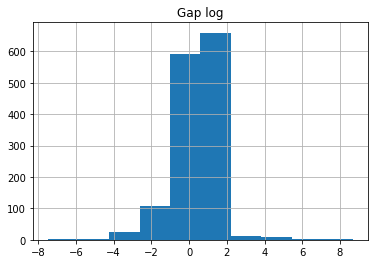

In [58]:
df[["Gap log"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12f41844e0>]],
      dtype=object)

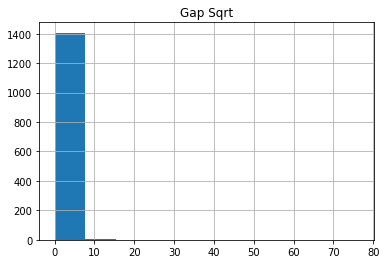

In [59]:
df[["Gap Sqrt"]].hist()